In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

Use GPU for fast training

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Load MNIST dataset

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

Let me show you some examples of MNIST dataset

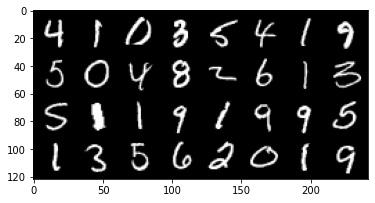

tensor(4) tensor(1) tensor(0) tensor(3)


In [5]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(4)))

Define a Convolutional Neural Network  
Experiment with 3 different combination of layers (conv and pooling).




In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 7)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, 7, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding = 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net1 = Net1()
net2 = Net2()
net3 = Net3()
net1.to(device)
net2.to(device)
net3.to(device)
net_list = [net1, net2, net3]

Reasonable learning rate choose for minimum loss, and momentum has given to overcome local minima and fast convergence.

In [7]:
import torch.optim as optim
# loss list for learning curve
loss_list = []
for net in net_list:
    current_loss = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            current_loss.append(loss.item())
            if i % 500 == 499:    # print every 500 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
    loss_list.append(current_loss)
print('Finished Training')

[1,   500] loss: 2.290
[1,  1000] loss: 1.901
[1,  1500] loss: 0.602
[2,   500] loss: 0.376
[2,  1000] loss: 0.317
[2,  1500] loss: 0.269
[1,   500] loss: 2.299
[1,  1000] loss: 2.271
[1,  1500] loss: 1.372
[2,   500] loss: 0.400
[2,  1000] loss: 0.308
[2,  1500] loss: 0.238
[1,   500] loss: 2.291
[1,  1000] loss: 1.726
[1,  1500] loss: 0.516
[2,   500] loss: 0.277
[2,  1000] loss: 0.222
[2,  1500] loss: 0.183
Finished Training


Show learning curve of each network

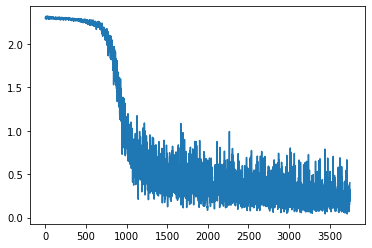

In [8]:
plt.plot(loss_list[0])

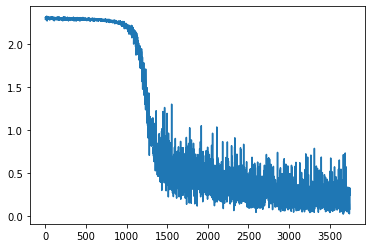

In [9]:
plt.plot(loss_list[1])

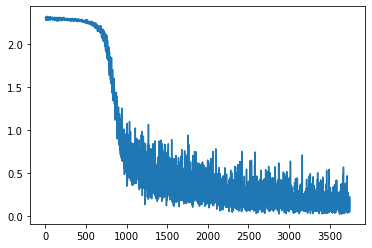

In [10]:
plt.plot(loss_list[2])

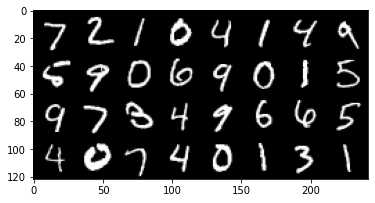

GroundTruth:  tensor(7) tensor(2) tensor(1) tensor(0)


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(4)))

In [12]:
for net in net_list:
    outputs = net(images.to(device))
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % predicted[j]
                                  for j in range(4)))

Predicted:  tensor(7, device='cuda:0') tensor(2, device='cuda:0') tensor(1, device='cuda:0') tensor(0, device='cuda:0')
Predicted:  tensor(7, device='cuda:0') tensor(2, device='cuda:0') tensor(1, device='cuda:0') tensor(0, device='cuda:0')
Predicted:  tensor(7, device='cuda:0') tensor(2, device='cuda:0') tensor(1, device='cuda:0') tensor(0, device='cuda:0')


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [13]:
for net in net_list:
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the 10000 test images: 93 %
Accuracy of the network on the 10000 test images: 94 %
Accuracy of the network on the 10000 test images: 95 %


You can see accuracy is quite similar with ANN of HW2(97 ~ 98 %), which means CNN shows good performance while reducing calculation.  
Net3 shows best accuracy, as it's most complicated network.